# Video inference

Loop on frames

Plot prob bargraph

Overlap text of class

Generate CAM video of heatmap overlayed

In [0]:
from google.colab import drive
drive.mount('/content/drive')
home_dir = '/content/drive/My Drive/Colab Notebooks/FER/'
baum_dir = home_dir + "BAUM/"


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import os, glob
import pandas as pd
import numpy as np

In [0]:

# load and evaluate a saved model
model_path = os.path.join(baum_dir, 'models', 'offlineFusionModel.h5')

model = load_model(model_path)
# summarize model.
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 48, 48, 3)]  0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 48, 48, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 44, 44, 64)   4864        input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_5 (Conv2D)               (None, 44, 44, 64)   4864        input_2[0][0]                    
______________________________________________________________________________________________

In [0]:

data_labels_xl =  pd.read_excel(baum_dir +"Annotations_BAUM1s.xlsx")
data_labels = np.array(data_labels_xl)


Taking random Image from  60498 images


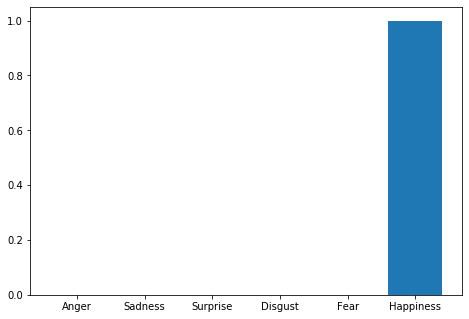

In [0]:
import cv2
import numpy as np
from glob import glob
from random import seed
from random import randint
import matplotlib.pyplot as plt

none_image = None

flow = baum_dir + 'imgs_flow/'
spatial = baum_dir + 'imgs_spatial/'

flowImgs = glob(flow+'*/*/*.png')
print("Taking random Image from ", len(flowImgs), "images")

def get_emotion_code(arr):
  emotions_code_arr = [1, 10, 11, 6, 7, 8]
  result_val = max(arr)
  result = list(arr).index(result_val)
  emotions_code = emotions_code_arr[result]
  return  emotions_code


val = randint(0, len(flowImgs))
img = flowImgs[val]
sample_name =img.split('/')[-2]
for label in data_labels:
        if label[3] == sample_name:
            emotion = label[4]
            gt_code = label[5]
            break
#print("Ground truth for " ,sample_name , " is : ", emotion, gt_code )

flowImg = cv2.imread(img)
spatialImg = cv2.imread(img.replace('imgs_flow','imgs_spatial'))
if (not isinstance(flowImg, type(none_image))) and (not isinstance(spatialImg, type(none_image))):
  flowImg = cv2.resize(flowImg, (48,48))
  spatialImg = cv2.resize(spatialImg, (48,48))
  flowImg = cv2.cvtColor(flowImg, cv2.COLOR_BGR2RGB)
  spatialImg = cv2.cvtColor(spatialImg, cv2.COLOR_BGR2RGB)
  flowImg = flowImg.reshape(-1, 48,48,3)
  spatialImg = spatialImg.reshape(-1, 48,48,3)

  out = model.predict([spatialImg, flowImg])

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
emotions = ['Anger','Sadness', 'Surprise', 'Disgust', 'Fear', 'Happiness']
ax.bar(emotions,out[0])
plt.show()


Taking 100 random Images from  60498 images
acuuracy is:  96.0 %


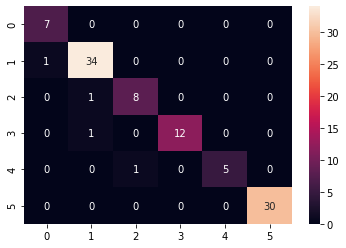

In [0]:
import numpy as np
from sklearn.metrics import confusion_matrix
import cv2
import numpy as np
from glob import glob
from random import seed
from random import randint
import matplotlib.pyplot as plt

none_image = None

flow = baum_dir + 'imgs_flow/'
spatial = baum_dir + 'imgs_spatial/'

flowImgs = glob(flow+'*/*/*.png')
print("Taking 100 random Images from ", len(flowImgs), "images")

emotions_code_arr = [1, 10, 11, 6, 7, 8]
def get_emotion_code(arr):
  result_val = max(arr)
  result = list(arr).index(result_val)
  emotions_code = emotions_code_arr[result]
  return  emotions_code


good_prediction = 0
bad_prediction = 0
i = 0
outs = []
gt = []
while i < 100:
  val = randint(0, len(flowImgs))
  img = flowImgs[val]
  sample_name =img.split('/')[-2]
  for label in data_labels:
          if label[3] == sample_name:
              emotion = label[4]
              gt_code = label[5]
              break

  #print img 
  flowImg = cv2.imread(img)
  spatialImg = cv2.imread(img.replace('imgs_flow','imgs_spatial'))
  if (not isinstance(flowImg, type(none_image))) and (not isinstance(spatialImg, type(none_image))):
      i+=1
      flowImg = cv2.resize(flowImg, (48,48))
      spatialImg = cv2.resize(spatialImg, (48,48))
      flowImg = cv2.cvtColor(flowImg, cv2.COLOR_BGR2RGB)
      spatialImg = cv2.cvtColor(spatialImg, cv2.COLOR_BGR2RGB)
      flowImg = flowImg.reshape(-1, 48,48,3)
      spatialImg = spatialImg.reshape(-1, 48,48,3)

      out = model.predict([spatialImg, flowImg])
      outs.append(out[0])
      gt.append(emotions_code_arr.index(gt_code))
      #print (out)

      emotions_code = get_emotion_code(out[0])
      if emotions_code == gt_code:
          good_prediction += 1
      else:
          bad_prediction += 1


print("acuuracy is: ", 100 *good_prediction/(good_prediction+bad_prediction), "%" )

y_predict = np.argmax(outs, axis=1)
cm = confusion_matrix(gt, y_predict)
import seaborn as sns
sns.heatmap(cm, annot=True, fmt="d")

# Test on Video

In [0]:
# Needed Functions
# Create a face detec tion module 
calssifiers =['haarcascade_frontalface_default.xml',
              'haarcascade_frontalface_alt2.xml',
              'haarcascade_frontalcatface_extended.xml',
              'haarcascade_frontalcatface.xml',
              'haarcascade_frontalface_alt_tree.xml',
              'haarcascade_frontalface_alt.xml']

home_dir = '/content/drive/My Drive/Colab Notebooks/FER/'
baum_dir = home_dir + "BAUM/"
def detectFace(img):
    for classifier in calssifiers:
        face_cascade = cv2.CascadeClassifier(home_dir +'face_detectors/' + classifier)
        faces = face_cascade.detectMultiScale(img, 1.3, 1)
        if (len(faces) > 0):
            return faces
    faces = []
    return faces

# Test On Trained Classes

Video Name: S011_022 Label: Happiness
Frame: 0/142
Frame: 1/142
True: Happiness, Out: Happiness, Prob.: [1.8327164e-07 2.8490936e-08 2.1631139e-07 3.0177148e-08 3.1333666e-06
 9.9999642e-01]


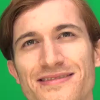

Frame: 2/142
True: Happiness, Out: Happiness, Prob.: [5.4791337e-07 4.2510671e-08 5.2046607e-07 3.8287727e-08 6.4437481e-06
 9.9999237e-01]


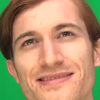

Frame: 3/142
True: Happiness, Out: Happiness, Prob.: [1.78112145e-06 4.08525324e-07 1.63253890e-06 3.06193755e-07
 1.25788165e-05 9.99983311e-01]


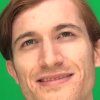

Frame: 4/142
True: Happiness, Out: Happiness, Prob.: [9.8799330e-07 1.2149621e-07 9.2170620e-07 7.4290199e-08 7.2596540e-06
 9.9999058e-01]


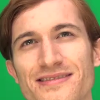

Frame: 5/142
True: Happiness, Out: Happiness, Prob.: [3.5479570e-07 3.9367080e-08 3.5032528e-07 2.9474910e-08 4.0377972e-06
 9.9999523e-01]


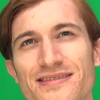

Frame: 6/142
True: Happiness, Out: Happiness, Prob.: [5.3590504e-08 1.0920578e-08 6.7136959e-08 1.2070560e-08 1.9047317e-06
 9.9999797e-01]


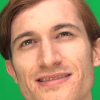

Frame: 7/142
True: Happiness, Out: Happiness, Prob.: [5.5819163e-07 1.4143004e-07 6.2208392e-07 1.3725949e-07 9.1020147e-06
 9.9998939e-01]


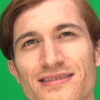

Frame: 8/142
True: Happiness, Out: Happiness, Prob.: [4.9867424e-07 4.9344699e-08 4.1593736e-07 4.7234359e-08 5.9530721e-06
 9.9999309e-01]


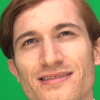

Frame: 9/142
True: Happiness, Out: Happiness, Prob.: [4.7584433e-07 2.6879885e-08 4.2015748e-07 2.0077957e-08 5.6854055e-06
 9.9999332e-01]


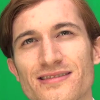

Frame: 10/142
True: Happiness, Out: Happiness, Prob.: [4.1852013e-07 4.5403748e-08 4.1445054e-07 3.8055973e-08 5.0752988e-06
 9.9999404e-01]


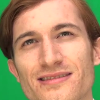

Frame: 11/142
True: Happiness, Out: Happiness, Prob.: [2.9748207e-07 4.6172552e-08 2.9259786e-07 3.8440156e-08 4.8529000e-06
 9.9999452e-01]


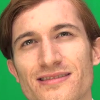

Frame: 12/142
True: Happiness, Out: Happiness, Prob.: [1.12967264e-07 2.74607075e-08 1.25397918e-07 3.39041435e-08
 4.16790363e-06 9.99995589e-01]


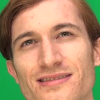

Frame: 13/142
True: Happiness, Out: Happiness, Prob.: [8.2008688e-07 1.1832434e-07 7.5839057e-07 7.8870777e-08 7.3720589e-06
 9.9999082e-01]


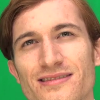

Frame: 14/142
True: Happiness, Out: Happiness, Prob.: [8.3348550e-07 1.3541344e-07 6.5011659e-07 1.3819860e-07 9.1356324e-06
 9.9998915e-01]


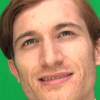

Frame: 15/142
True: Happiness, Out: Happiness, Prob.: [1.9037944e-07 1.7575671e-08 1.9330648e-07 1.8063748e-08 3.2049295e-06
 9.9999642e-01]


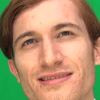

Frame: 16/142
True: Happiness, Out: Happiness, Prob.: [4.0848059e-07 4.8668760e-08 3.1514463e-07 4.6068287e-08 5.1160855e-06
 9.9999404e-01]


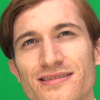

Frame: 17/142
True: Happiness, Out: Happiness, Prob.: [1.5980731e-07 2.0319856e-08 1.6594227e-07 1.6648446e-08 2.6883622e-06
 9.9999690e-01]


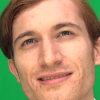

Frame: 18/142
True: Happiness, Out: Happiness, Prob.: [1.07438204e-07 1.92886027e-08 1.19728824e-07 2.05547082e-08
 3.11152826e-06 9.99996662e-01]


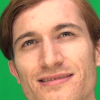

Frame: 19/142
True: Happiness, Out: Happiness, Prob.: [2.3934183e-07 3.0802621e-08 2.2593339e-07 2.7296792e-08 3.6734129e-06
 9.9999583e-01]


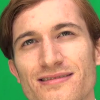

Frame: 20/142
True: Happiness, Out: Happiness, Prob.: [3.7731954e-07 7.6025323e-08 3.6762057e-07 6.0535029e-08 5.6367794e-06
 9.9999344e-01]


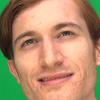

Frame: 21/142
True: Happiness, Out: Happiness, Prob.: [1.2324318e-07 2.2591436e-08 1.4208368e-07 1.8099247e-08 2.6611606e-06
 9.9999702e-01]


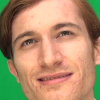

Frame: 22/142
True: Happiness, Out: Happiness, Prob.: [1.7477028e-07 3.6832116e-08 1.9570467e-07 4.1805091e-08 5.2264991e-06
 9.9999428e-01]


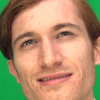

Frame: 23/142
True: Happiness, Out: Happiness, Prob.: [1.0973225e-07 1.6647991e-08 1.1121458e-07 1.5306107e-08 3.2659570e-06
 9.9999642e-01]


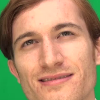

Frame: 24/142
True: Happiness, Out: Happiness, Prob.: [2.7382365e-08 6.0398246e-09 3.5426488e-08 7.3998372e-09 2.1626101e-06
 9.9999774e-01]


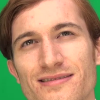

Frame: 25/142
True: Happiness, Out: Happiness, Prob.: [1.1481891e-08 2.8890570e-09 1.6857967e-08 6.1964847e-09 1.2012291e-06
 9.9999881e-01]


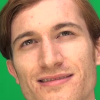

Frame: 26/142
True: Happiness, Out: Happiness, Prob.: [5.4511941e-07 1.0937618e-07 4.8393935e-07 8.4547096e-08 6.1291380e-06
 9.9999261e-01]


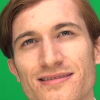

Frame: 27/142
True: Happiness, Out: Happiness, Prob.: [2.5244739e-07 5.0996526e-08 2.6247795e-07 4.0040153e-08 3.7882480e-06
 9.9999559e-01]


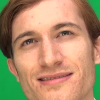

Frame: 28/142
True: Happiness, Out: Happiness, Prob.: [2.1595459e-07 9.2357652e-08 2.8795247e-07 1.0643488e-07 4.7380017e-06
 9.9999452e-01]


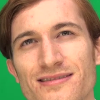

Frame: 29/142
True: Happiness, Out: Happiness, Prob.: [1.9937104e-07 9.4618862e-08 3.1268016e-07 1.3493748e-07 5.4977259e-06
 9.9999380e-01]


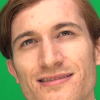

Frame: 30/142
True: Happiness, Out: Happiness, Prob.: [1.4292620e-07 5.0841663e-08 1.8955585e-07 6.5681149e-08 5.0258204e-06
 9.9999452e-01]


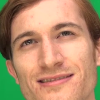

Frame: 31/142
True: Happiness, Out: Happiness, Prob.: [2.8397412e-07 1.2539942e-07 2.4191576e-07 1.7728462e-07 1.0609526e-05
 9.9998856e-01]


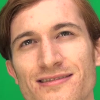

Frame: 32/142
True: Happiness, Out: Happiness, Prob.: [2.8218165e-07 4.4053202e-08 2.3353869e-07 3.7757683e-08 4.8013831e-06
 9.9999464e-01]


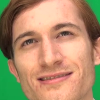

Frame: 33/142
True: Happiness, Out: Happiness, Prob.: [8.6916754e-07 1.7244881e-07 6.9821391e-07 1.3971190e-07 1.0981687e-05
 9.9998713e-01]


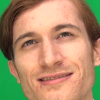

Frame: 34/142
True: Happiness, Out: Happiness, Prob.: [3.2270356e-07 2.1976898e-07 3.6836963e-07 1.7226027e-07 1.0810029e-05
 9.9998808e-01]


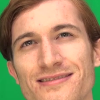

Frame: 35/142
True: Happiness, Out: Happiness, Prob.: [1.5320474e-07 1.0302054e-07 1.8750784e-07 9.0020109e-08 7.5598996e-06
 9.9999189e-01]


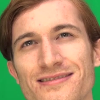

Frame: 36/142
True: Happiness, Out: Happiness, Prob.: [8.0352254e-07 5.0993134e-07 8.8340965e-07 4.9342106e-07 1.7163988e-05
 9.9998009e-01]


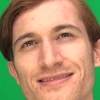

Frame: 37/142
True: Happiness, Out: Happiness, Prob.: [7.1790566e-07 4.0389355e-07 7.9335729e-07 4.0903470e-07 1.5720276e-05
 9.9998200e-01]


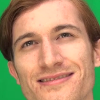

Frame: 38/142
True: Happiness, Out: Happiness, Prob.: [1.5458331e-06 9.6686324e-07 1.5721813e-06 1.0321872e-06 2.7214579e-05
 9.9996769e-01]


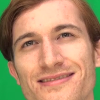

Frame: 39/142
True: Happiness, Out: Happiness, Prob.: [7.2507260e-07 2.0866642e-07 8.2586331e-07 1.8805186e-07 1.0046779e-05
 9.9998796e-01]


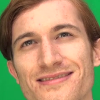

Frame: 40/142
True: Happiness, Out: Happiness, Prob.: [2.9225339e-07 5.7671777e-08 3.2344440e-07 4.5712547e-08 5.8265296e-06
 9.9999344e-01]


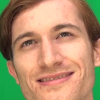

Frame: 41/142
True: Happiness, Out: Happiness, Prob.: [4.9393049e-07 6.7541691e-08 4.7986379e-07 6.8017172e-08 6.3530742e-06
 9.9999249e-01]


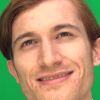

Frame: 42/142
True: Happiness, Out: Happiness, Prob.: [4.5941877e-07 6.7556954e-08 4.5167502e-07 5.8234622e-08 5.6259942e-06
 9.9999332e-01]


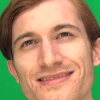

Frame: 43/142
True: Happiness, Out: Happiness, Prob.: [1.7876538e-07 1.7009834e-08 1.6944061e-07 1.4312656e-08 2.7048854e-06
 9.9999690e-01]


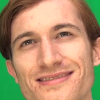

Frame: 44/142
True: Happiness, Out: Happiness, Prob.: [3.3601245e-07 2.8823328e-08 3.6838517e-07 2.1618083e-08 4.2977940e-06
 9.9999499e-01]


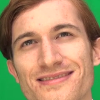

Frame: 45/142
True: Happiness, Out: Happiness, Prob.: [1.38637148e-07 1.46670045e-08 1.55173865e-07 1.05247873e-08
 2.66875190e-06 9.99997020e-01]


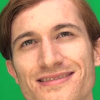

Frame: 46/142
True: Happiness, Out: Happiness, Prob.: [1.1054747e-07 9.8861852e-09 1.5113910e-07 7.0820683e-09 2.1150674e-06
 9.9999762e-01]


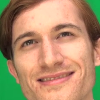

Frame: 47/142
True: Happiness, Out: Happiness, Prob.: [2.3417330e-07 2.1032427e-08 2.4200733e-07 1.6271365e-08 3.3658739e-06
 9.9999607e-01]


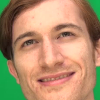

Frame: 48/142
True: Happiness, Out: Happiness, Prob.: [2.8138331e-07 3.1145383e-08 2.9517133e-07 2.1693978e-08 3.6924844e-06
 9.9999571e-01]


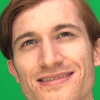

Frame: 49/142
True: Happiness, Out: Happiness, Prob.: [2.2116460e-07 1.9127400e-08 2.3454868e-07 1.3692961e-08 2.9573921e-06
 9.9999654e-01]


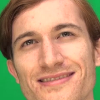

Frame: 50/142
True: Happiness, Out: Happiness, Prob.: [1.8240858e-07 2.5366392e-08 2.0306112e-07 1.6232818e-08 2.6558589e-06
 9.9999690e-01]


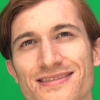

Frame: 51/142
True: Happiness, Out: Happiness, Prob.: [8.88404230e-08 4.52811832e-08 1.08142245e-07 3.45366580e-08
 4.17605952e-06 9.99995589e-01]


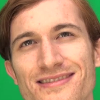

Frame: 52/142
True: Happiness, Out: Happiness, Prob.: [1.6452630e-07 1.3121265e-08 1.6948316e-07 9.0727958e-09 2.4651579e-06
 9.9999714e-01]


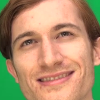

Frame: 53/142
True: Happiness, Out: Happiness, Prob.: [4.6589115e-08 9.7138537e-09 5.5203035e-08 6.0606680e-09 1.7530554e-06
 9.9999809e-01]


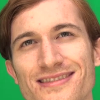

Frame: 54/142
True: Happiness, Out: Happiness, Prob.: [2.23282314e-07 1.07484276e-07 3.12027936e-07 1.08815996e-07
 6.85627310e-06 9.99992371e-01]


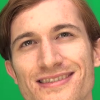

Frame: 55/142
True: Happiness, Out: Happiness, Prob.: [6.2797932e-07 1.6679260e-07 6.5866732e-07 1.4946973e-07 8.6951677e-06
 9.9998975e-01]


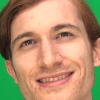

Frame: 56/142
True: Happiness, Out: Happiness, Prob.: [5.1627256e-07 9.2300226e-08 5.2633709e-07 6.8748356e-08 6.2996619e-06
 9.9999249e-01]


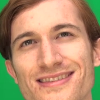

Frame: 57/142
True: Happiness, Out: Happiness, Prob.: [2.1515939e-07 3.0407961e-08 2.3405143e-07 1.9018692e-08 3.3682470e-06
 9.9999619e-01]


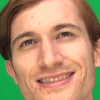

Frame: 58/142
True: Happiness, Out: Happiness, Prob.: [4.5781334e-08 8.3446707e-09 6.9911863e-08 6.2984795e-09 1.8921722e-06
 9.9999797e-01]


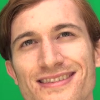

Frame: 59/142
True: Happiness, Out: Happiness, Prob.: [5.5241748e-07 4.8564335e-08 3.6460648e-07 3.4907998e-08 5.1752063e-06
 9.9999380e-01]


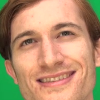

Frame: 60/142
True: Happiness, Out: Happiness, Prob.: [5.5009963e-07 4.0996337e-08 3.8477270e-07 2.8121150e-08 5.0864378e-06
 9.9999392e-01]


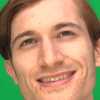

Frame: 61/142
True: Happiness, Out: Happiness, Prob.: [5.415669e-07 4.974190e-08 3.870360e-07 3.581060e-08 5.200240e-06
 9.999938e-01]


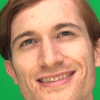

Frame: 62/142
True: Happiness, Out: Happiness, Prob.: [3.7835852e-07 1.8280813e-08 2.7775175e-07 1.0494384e-08 3.6088713e-06
 9.9999571e-01]


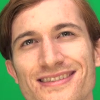

Frame: 63/142
True: Happiness, Out: Happiness, Prob.: [3.0126441e-07 1.6427432e-08 2.4513142e-07 1.2649808e-08 3.8304033e-06
 9.9999559e-01]


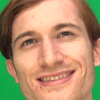

Frame: 64/142
True: Happiness, Out: Happiness, Prob.: [4.5274464e-07 3.9261995e-08 3.8720981e-07 4.9277052e-08 6.4684946e-06
 9.9999261e-01]


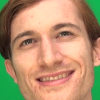

Frame: 65/142
True: Happiness, Out: Happiness, Prob.: [3.9635023e-07 3.1885179e-08 3.2961501e-07 3.9960263e-08 5.7768661e-06
 9.9999344e-01]


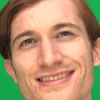

Frame: 66/142
True: Happiness, Out: Happiness, Prob.: [4.8533752e-07 3.2684653e-08 4.3534843e-07 3.3733819e-08 6.2694990e-06
 9.9999273e-01]


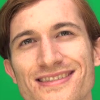

Frame: 67/142
True: Happiness, Out: Happiness, Prob.: [3.1922457e-07 1.9769104e-08 3.1894524e-07 1.2209279e-08 3.3605681e-06
 9.9999595e-01]


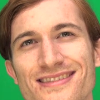

Frame: 68/142
True: Happiness, Out: Happiness, Prob.: [3.7026726e-07 1.4293594e-08 3.2255147e-07 9.5369623e-09 3.8065214e-06
 9.9999547e-01]


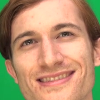

Frame: 69/142
True: Happiness, Out: Happiness, Prob.: [1.9942213e-07 8.7181036e-09 2.0639392e-07 5.1670002e-09 2.3564151e-06
 9.9999726e-01]


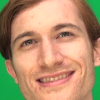

Frame: 70/142
True: Happiness, Out: Happiness, Prob.: [2.5529071e-06 7.3075012e-07 2.1346718e-06 7.0513073e-07 2.0627702e-05
 9.9997330e-01]


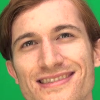

Frame: 71/142
True: Happiness, Out: Happiness, Prob.: [1.2318831e-07 1.8897685e-08 1.4532847e-07 1.0976326e-08 2.5444463e-06
 9.9999714e-01]


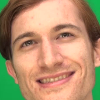

Frame: 72/142
True: Happiness, Out: Happiness, Prob.: [1.7808360e-07 1.1273438e-08 1.8143395e-07 8.7142791e-09 2.4370420e-06
 9.9999714e-01]


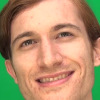

Frame: 73/142
True: Happiness, Out: Happiness, Prob.: [2.8489680e-07 3.0351682e-08 3.3249731e-07 2.0732346e-08 3.6503322e-06
 9.9999571e-01]


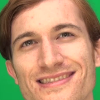

Frame: 74/142
True: Happiness, Out: Happiness, Prob.: [1.8381502e-07 1.6066512e-08 2.3408013e-07 1.1799571e-08 2.7438255e-06
 9.9999678e-01]


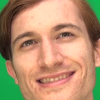

Frame: 75/142
True: Happiness, Out: Happiness, Prob.: [1.5181975e-07 1.0732085e-08 1.9078672e-07 7.4059616e-09 2.3368980e-06
 9.9999726e-01]


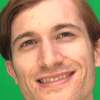

Frame: 76/142
True: Happiness, Out: Happiness, Prob.: [1.5236859e-07 1.1218975e-08 1.9567706e-07 8.7084633e-09 2.5025104e-06
 9.9999714e-01]


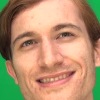

Frame: 77/142
True: Happiness, Out: Happiness, Prob.: [8.7858218e-08 5.4449263e-09 1.1821364e-07 4.1667350e-09 1.7012111e-06
 9.9999809e-01]


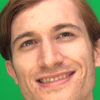

Frame: 78/142
True: Happiness, Out: Happiness, Prob.: [8.2463572e-08 4.8572675e-09 1.1101111e-07 3.4318919e-09 1.5399945e-06
 9.9999821e-01]


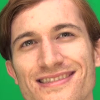

Frame: 79/142
True: Happiness, Out: Happiness, Prob.: [7.7993938e-08 6.5368884e-09 1.1036924e-07 4.9534825e-09 2.0468253e-06
 9.9999774e-01]


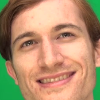

Frame: 80/142
True: Happiness, Out: Happiness, Prob.: [4.6416854e-08 6.6329444e-09 6.8525253e-08 5.2911799e-09 1.9700767e-06
 9.9999785e-01]


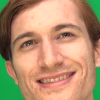

Frame: 81/142
True: Happiness, Out: Happiness, Prob.: [8.7122537e-08 1.6327931e-08 1.2504817e-07 1.1891347e-08 2.8220531e-06
 9.9999690e-01]


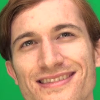

Frame: 82/142
True: Happiness, Out: Happiness, Prob.: [2.1109929e-07 1.6557614e-08 1.9937420e-07 1.1551715e-08 3.2130972e-06
 9.9999630e-01]


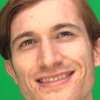

Frame: 83/142
True: Happiness, Out: Happiness, Prob.: [2.6630198e-07 2.5937544e-08 2.4543513e-07 2.3221723e-08 4.4798458e-06
 9.9999499e-01]


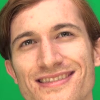

Frame: 84/142
True: Happiness, Out: Happiness, Prob.: [3.3987328e-07 3.0564042e-08 2.8989174e-07 2.6298949e-08 4.6925397e-06
 9.9999464e-01]


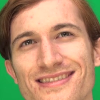

Frame: 85/142
True: Happiness, Out: Happiness, Prob.: [2.2195863e-07 2.4465038e-08 2.1087818e-07 2.1098630e-08 3.9924694e-06
 9.9999547e-01]


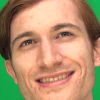

Frame: 86/142
True: Happiness, Out: Happiness, Prob.: [5.2691314e-07 6.6861396e-08 4.6114175e-07 4.6489479e-08 5.4881480e-06
 9.9999344e-01]


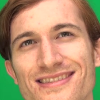

Frame: 87/142
True: Happiness, Out: Happiness, Prob.: [2.6007942e-07 3.3347703e-08 2.9455319e-07 2.4717663e-08 3.9363713e-06
 9.9999547e-01]


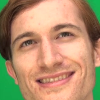

Frame: 88/142
True: Happiness, Out: Happiness, Prob.: [1.8119073e-07 9.4935331e-09 1.6720767e-07 5.5682969e-09 2.1545113e-06
 9.9999750e-01]


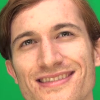

Frame: 89/142
True: Happiness, Out: Happiness, Prob.: [1.6598385e-07 8.7376844e-09 1.5602974e-07 5.4931162e-09 2.1017763e-06
 9.9999762e-01]


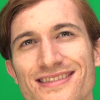

Frame: 90/142
True: Happiness, Out: Happiness, Prob.: [2.3150183e-07 1.5149508e-08 2.0896265e-07 8.8641112e-09 2.4828505e-06
 9.9999702e-01]


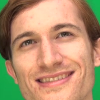

Frame: 91/142
True: Happiness, Out: Happiness, Prob.: [3.1772282e-07 1.9142689e-08 2.4506451e-07 1.0079353e-08 3.0155659e-06
 9.9999642e-01]


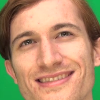

Frame: 92/142
True: Happiness, Out: Happiness, Prob.: [1.7199831e-07 7.9855349e-09 1.5966731e-07 5.2429883e-09 1.9168401e-06
 9.9999774e-01]


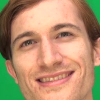

Frame: 93/142
True: Happiness, Out: Happiness, Prob.: [1.9338999e-07 5.8726051e-09 1.6392397e-07 4.3769370e-09 2.3794034e-06
 9.9999726e-01]


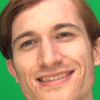

Frame: 94/142
True: Happiness, Out: Happiness, Prob.: [2.0599938e-07 4.4149639e-09 1.3240434e-07 1.7571999e-09 1.8486202e-06
 9.9999785e-01]


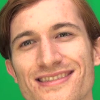

Frame: 95/142
True: Happiness, Out: Happiness, Prob.: [2.8405063e-07 8.1108009e-09 2.1335363e-07 4.2052442e-09 2.8613613e-06
 9.9999666e-01]


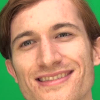

Frame: 96/142
True: Happiness, Out: Happiness, Prob.: [2.5023849e-07 6.7808852e-09 2.3671554e-07 4.1910537e-09 3.1878128e-06
 9.9999630e-01]


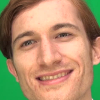

Frame: 97/142
True: Happiness, Out: Happiness, Prob.: [1.2158574e-07 2.8151288e-09 1.2875797e-07 2.1995281e-09 2.1887261e-06
 9.9999750e-01]


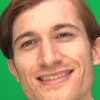

Frame: 98/142
True: Happiness, Out: Happiness, Prob.: [8.7888736e-08 1.5605394e-09 9.2094659e-08 1.0720839e-09 1.5933099e-06
 9.9999821e-01]


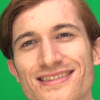

Frame: 99/142
True: Happiness, Out: Happiness, Prob.: [2.6420312e-07 8.4213223e-09 2.5153835e-07 6.1136438e-09 3.5256191e-06
 9.9999595e-01]


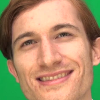

Frame: 100/142
True: Happiness, Out: Happiness, Prob.: [2.2752486e-07 6.1569247e-09 1.6953325e-07 3.0123093e-09 2.5310285e-06
 9.9999702e-01]


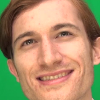

Frame: 101/142
True: Happiness, Out: Happiness, Prob.: [9.7564914e-08 2.3537632e-09 9.0309243e-08 1.3226906e-09 1.7016005e-06
 9.9999809e-01]


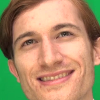

Frame: 102/142
True: Happiness, Out: Happiness, Prob.: [1.0001050e-07 3.2038081e-09 9.4157294e-08 2.0777551e-09 1.8810513e-06
 9.9999797e-01]


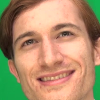

Frame: 103/142
True: Happiness, Out: Happiness, Prob.: [2.4142150e-07 9.0849825e-09 1.9558274e-07 5.3271325e-09 2.8493525e-06
 9.9999666e-01]


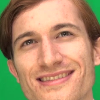

Frame: 104/142
True: Happiness, Out: Happiness, Prob.: [3.6115341e-07 2.2014538e-08 3.2914389e-07 1.4297318e-08 4.6821065e-06
 9.9999464e-01]


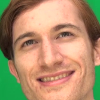

Frame: 105/142
True: Happiness, Out: Happiness, Prob.: [1.8081484e-07 7.9034752e-09 1.5772034e-07 5.2030660e-09 2.6986911e-06
 9.9999690e-01]


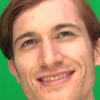

Frame: 106/142
True: Happiness, Out: Happiness, Prob.: [1.7380903e-07 7.5135533e-09 1.5162264e-07 5.1111675e-09 2.6113396e-06
 9.9999702e-01]


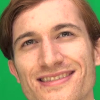

Frame: 107/142
True: Happiness, Out: Happiness, Prob.: [1.3878123e-07 9.4748627e-09 1.4497273e-07 6.5495405e-09 2.4314616e-06
 9.9999726e-01]


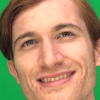

Frame: 108/142
True: Happiness, Out: Happiness, Prob.: [2.2935403e-07 2.0721112e-08 2.6777352e-07 1.7647066e-08 4.0965951e-06
 9.9999535e-01]


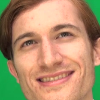

Frame: 109/142
True: Happiness, Out: Happiness, Prob.: [6.6262260e-07 4.7148415e-08 5.6010344e-07 4.3553953e-08 7.2049247e-06
 9.9999154e-01]


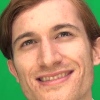

Frame: 110/142
True: Happiness, Out: Happiness, Prob.: [1.9401543e-07 1.8905848e-08 2.2834611e-07 1.8330818e-08 3.4964087e-06
 9.9999607e-01]


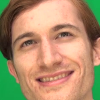

Frame: 111/142
True: Happiness, Out: Happiness, Prob.: [1.7217872e-07 8.0405655e-09 1.7686395e-07 6.1575944e-09 2.6741991e-06
 9.9999702e-01]


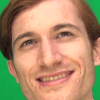

Frame: 112/142
True: Happiness, Out: Happiness, Prob.: [1.8103502e-07 8.2236156e-09 1.7631628e-07 5.9255081e-09 2.6375744e-06
 9.9999702e-01]


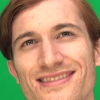

Frame: 113/142
True: Happiness, Out: Happiness, Prob.: [5.1182928e-07 4.7778240e-08 5.0556292e-07 5.0603926e-08 6.8243839e-06
 9.9999201e-01]


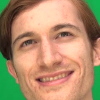

Frame: 114/142
True: Happiness, Out: Happiness, Prob.: [4.8823978e-07 3.3738058e-08 5.0494833e-07 2.7113117e-08 6.4465826e-06
 9.9999249e-01]


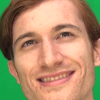

Frame: 115/142
True: Happiness, Out: Happiness, Prob.: [1.6111292e-07 6.0448548e-09 1.6586328e-07 5.0096123e-09 2.9188880e-06
 9.9999678e-01]


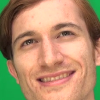

Frame: 116/142
True: Happiness, Out: Happiness, Prob.: [1.95021528e-07 2.11964064e-08 2.33007668e-07 1.46341765e-08
 3.95505094e-06 9.99995589e-01]


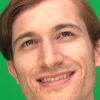

Frame: 117/142
True: Happiness, Out: Happiness, Prob.: [3.6287855e-07 2.6013062e-08 3.8086219e-07 2.1899179e-08 5.6716244e-06
 9.9999356e-01]


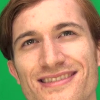

Frame: 118/142
True: Happiness, Out: Happiness, Prob.: [2.4049174e-07 1.0341384e-08 2.3456793e-07 7.8109563e-09 3.8484404e-06
 9.9999571e-01]


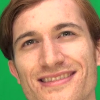

Frame: 119/142
True: Happiness, Out: Happiness, Prob.: [3.1203717e-07 3.0377613e-08 3.4546150e-07 2.1615120e-08 4.0219670e-06
 9.9999523e-01]


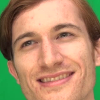

Frame: 120/142
True: Happiness, Out: Happiness, Prob.: [2.0565767e-07 9.4123580e-09 1.9563673e-07 6.1838175e-09 2.5588176e-06
 9.9999702e-01]


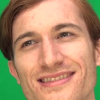

Frame: 121/142
True: Happiness, Out: Happiness, Prob.: [7.55621272e-08 1.36843532e-08 9.75352421e-08 1.05096225e-08
 2.66399707e-06 9.99997139e-01]


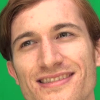

Frame: 122/142
True: Happiness, Out: Happiness, Prob.: [1.7350557e-07 5.0873393e-08 2.0961924e-07 3.9980293e-08 4.7896715e-06
 9.9999475e-01]


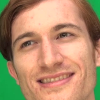

Frame: 123/142
True: Happiness, Out: Happiness, Prob.: [3.2743498e-07 3.1001349e-08 3.3559877e-07 2.3136755e-08 4.0463283e-06
 9.9999523e-01]


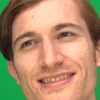

Frame: 124/142
True: Happiness, Out: Happiness, Prob.: [2.2678006e-07 3.3313487e-08 2.2940689e-07 2.8058816e-08 4.5420725e-06
 9.9999499e-01]


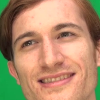

Frame: 125/142
True: Happiness, Out: Happiness, Prob.: [2.9245240e-07 2.1082974e-08 3.0127603e-07 1.6644954e-08 4.3047717e-06
 9.9999511e-01]


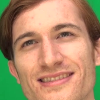

Frame: 126/142
True: Happiness, Out: Happiness, Prob.: [4.0044415e-07 2.9095434e-08 3.4836046e-07 2.2591234e-08 5.5348978e-06
 9.9999368e-01]


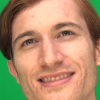

Frame: 127/142
True: Happiness, Out: Happiness, Prob.: [3.5686637e-07 2.6753570e-08 2.9434614e-07 2.1588644e-08 5.1513266e-06
 9.9999416e-01]


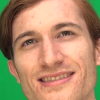

Frame: 128/142
True: Happiness, Out: Happiness, Prob.: [3.6422529e-07 2.2086166e-08 3.0531143e-07 1.4582926e-08 4.4495418e-06
 9.9999487e-01]


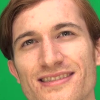

Frame: 129/142
True: Happiness, Out: Happiness, Prob.: [3.678627e-07 6.884817e-08 3.720013e-07 6.261492e-08 7.256556e-06
 9.999919e-01]


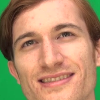

Frame: 130/142
True: Happiness, Out: Happiness, Prob.: [5.6361051e-07 4.6848346e-08 3.9269094e-07 3.6288842e-08 6.3383332e-06
 9.9999261e-01]


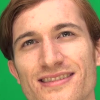

Frame: 131/142
True: Happiness, Out: Happiness, Prob.: [3.2386575e-07 2.2997508e-08 2.3777191e-07 1.5495967e-08 4.0816126e-06
 9.9999535e-01]


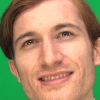

Frame: 132/142
True: Happiness, Out: Happiness, Prob.: [2.4031027e-07 1.4791021e-08 1.9330328e-07 9.4129593e-09 3.5030871e-06
 9.9999607e-01]


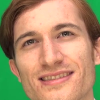

Frame: 133/142
True: Happiness, Out: Happiness, Prob.: [2.8000886e-06 4.9041563e-07 2.0264740e-06 3.3110757e-07 1.9557645e-05
 9.9997485e-01]


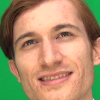

Frame: 134/142
True: Happiness, Out: Happiness, Prob.: [1.7309267e-06 2.6155200e-07 1.2524036e-06 1.8995676e-07 1.3100424e-05
 9.9998343e-01]


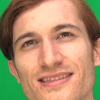

Frame: 135/142
True: Happiness, Out: Happiness, Prob.: [1.5687932e-06 1.9267092e-07 1.1715347e-06 1.4061304e-07 1.2218130e-05
 9.9998474e-01]


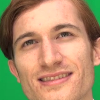

Frame: 136/142
True: Happiness, Out: Happiness, Prob.: [3.8902195e-07 3.3367964e-08 3.2947608e-07 2.6810072e-08 4.8023530e-06
 9.9999440e-01]


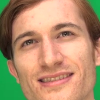

Frame: 137/142
True: Happiness, Out: Happiness, Prob.: [2.0669462e-07 8.2799957e-08 2.4496930e-07 6.2218675e-08 6.2890349e-06
 9.9999309e-01]


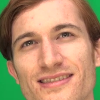

Frame: 138/142
True: Happiness, Out: Happiness, Prob.: [6.8769782e-07 8.1577134e-08 6.0923924e-07 5.9508391e-08 6.7522260e-06
 9.9999177e-01]


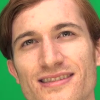

Frame: 139/142
Frame: 140/142
Frame: 141/142


In [0]:
import cv2
import numpy as np
from glob import glob
import pandas as pd
from google.colab.patches import cv2_imshow
from random import randint
#seed(2)

videos = glob(baum_dir+'BAUM1s_MP4 - All/*/*.mp4')
emotions = ['Anger', 'Sadness', 'Surprise', 'Disgust', 'Fear', 'Happiness']

data_labels_xl =  pd.read_excel(baum_dir + "Annotations_BAUM1s.xlsx")
data_labels = np.array(data_labels_xl)

#print (vid)
# Assert Video Code
val = randint(0, len(videos)-1)
#print (len(videos))
vid = videos[val]
vidName = vid.split('/')[-1].split('.')[0]
vidLabel = str(data_labels_xl.loc[data_labels_xl['Clip Name'] == vidName]['Emotion'].values[0])
vidCode = int(data_labels_xl.loc[data_labels_xl['Clip Name'] == vidName]['Emotion Code'].values[0])

while vidCode not in ([1, 10, 11, 6, 7, 8]):
  val = randint(0, len(videos))
  vid = videos[val]
  vidName = vid.split('/')[-1].split('.')[0]
  #print (vidName)
  try:
    vidLabel = str(data_labels_xl.loc[data_labels_xl['Clip Name'] == vidName]['Emotion'].values[0])
    vidCode = int(data_labels_xl.loc[data_labels_xl['Clip Name'] == vidName]['Emotion Code'].values[0])
  except:
    print ("Video Emotion Not Found")
print ('Video Name: {} Label: {}'.format(vidName, vidLabel))

cap = cv2.VideoCapture(vid)
frameCount = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))  
ret, old_frame = cap.read()
old_gray = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)

temp_image = np.array([])
none_image = None

noFacesCnt = 0
calcOpticalFlow = 0
for i in range(frameCount):
    print ('Frame: {}/{}'.format(i, frameCount))
    ret,frame = cap.read()
    if isinstance(frame, type(temp_image)) and not isinstance(frame, type(none_image)) :
        frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = detectFace(frame_gray)
        if len(faces) == 0:
            calcOpticalFlow = 0
            noFacesCnt += 1
            continue

        (x,y,w,h)  = faces[0]
        frame_gray = frame_gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]

        if(frame_gray.shape[0] < 90 or roi_color.shape[0] < 90 ):
            calcOpticalFlow = 0
            continue

        #print(frame_gray.shape)
        frame_gray = cv2.resize(frame_gray, (100,100))
        roi_color = cv2.resize(roi_color, (100,100))
        #print(frame_gray.shape, "after")

        calcOpticalFlow += 1
        hsv = np.zeros_like(roi_color)
        hsv[...,1] = 255

        if (calcOpticalFlow > 1):
            flow = cv2.calcOpticalFlowFarneback(old_gray,frame_gray, None, 0.5, 3, 15, 3, 5, 1.2, 0)            
            mag, ang   = cv2.cartToPolar(flow[...,0], flow[...,1])
            hsv[...,0] = ang*180/np.pi/2
            hsv[...,2] = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX)
            rgb = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)
            
            flowImg = cv2.resize(rgb, (48,48))
            flowImg = flowImg.reshape(-1, 48,48,3)
            roi_color = cv2.cvtColor(roi_color, cv2.COLOR_BGR2RGB)
            spatialImg = cv2.resize(roi_color, (48,48))
            spatialImg = spatialImg.reshape(-1, 48,48,3)
            out = model.predict([spatialImg, flowImg])
            print ('True: {}, Out: {}, Prob.: {}'.format(vidLabel, emotions[np.argmax(out[0])], out[0]))
            #print ('Emotion {}'.format(vidLabel))
            cv2_imshow(cv2.cvtColor(roi_color, cv2.COLOR_RGB2BGR))
            #cv2.waitKey(0)
        old_gray = frame_gray.copy()

# Test on UnSure Emotion Video

Video Name: S002_046 Label: Unsure
Frame: 0/216
Frame: 1/216
True: Unsure, Out: Happiness, Prob.: [1.8052490e-04 7.2667950e-05 9.2329727e-05 3.9858605e-05 2.8532115e-04
 9.9932933e-01]


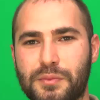

Frame: 2/216
True: Unsure, Out: Happiness, Prob.: [4.03481681e-05 3.02592944e-05 1.93793585e-05 1.15933508e-05
 1.07093285e-04 9.99791324e-01]


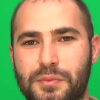

Frame: 3/216
True: Unsure, Out: Happiness, Prob.: [2.5738887e-05 5.2710798e-06 1.6911297e-05 2.7723338e-06 8.1763537e-05
 9.9986756e-01]


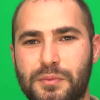

Frame: 4/216
True: Unsure, Out: Happiness, Prob.: [5.7722905e-06 7.2072243e-07 4.7767021e-06 4.9896090e-07 3.2841206e-05
 9.9995542e-01]


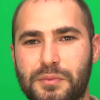

Frame: 5/216
True: Unsure, Out: Happiness, Prob.: [9.4019488e-06 2.7101794e-06 7.2470498e-06 1.7298959e-06 5.2343330e-05
 9.9992657e-01]


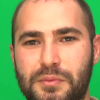

Frame: 6/216
True: Unsure, Out: Happiness, Prob.: [1.5722646e-06 2.6625702e-07 1.2977353e-06 2.0608722e-07 1.4096224e-05
 9.9998260e-01]


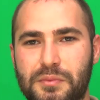

Frame: 7/216
True: Unsure, Out: Happiness, Prob.: [1.1534551e-04 8.0469326e-05 6.7260233e-05 5.9613874e-05 2.4861156e-04
 9.9942869e-01]


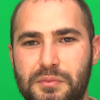

Frame: 8/216
True: Unsure, Out: Happiness, Prob.: [1.0330587e-06 1.5671972e-07 8.5539665e-07 1.2640503e-07 1.0114938e-05
 9.9998772e-01]


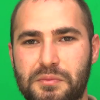

Frame: 9/216
True: Unsure, Out: Happiness, Prob.: [7.4269371e-07 8.4644341e-08 7.4795639e-07 5.7277923e-08 8.2607030e-06
 9.9999011e-01]


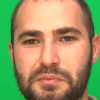

Frame: 10/216
True: Unsure, Out: Happiness, Prob.: [2.2875392e-05 4.2134898e-06 1.7584291e-05 4.1481262e-06 7.4310483e-05
 9.9987686e-01]


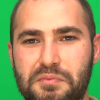

Frame: 11/216
True: Unsure, Out: Happiness, Prob.: [1.8625786e-05 4.0718301e-06 1.4475140e-05 3.6198860e-06 6.6911824e-05
 9.9989223e-01]


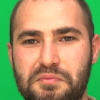

Frame: 12/216
True: Unsure, Out: Happiness, Prob.: [1.6209400e-04 5.3016527e-05 1.0595891e-04 5.3107262e-05 2.5798465e-04
 9.9936789e-01]


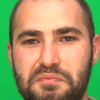

Frame: 13/216
True: Unsure, Out: Happiness, Prob.: [6.2284656e-05 1.5719428e-05 4.9112277e-05 2.3371807e-05 1.5043715e-04
 9.9969912e-01]


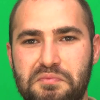

In [0]:
import cv2
import numpy as np
from glob import glob
import pandas as pd
from google.colab.patches import cv2_imshow
from random import randint
seed(2)

videos = glob(baum_dir+'BAUM1s_MP4 - All/*/*.mp4')
emotions = ['Anger', 'Sadness', 'Surprise', 'Disgust', 'Fear', 'Happiness']

data_labels_xl =  pd.read_excel(baum_dir + "Annotations_BAUM1s.xlsx")
data_labels = np.array(data_labels_xl)

#print (vid)
# Assert Video Code
val = randint(0, len(videos)-1)
#print (len(videos))
vid = videos[val]
vidName = vid.split('/')[-1].split('.')[0]
vidLabel = str(data_labels_xl.loc[data_labels_xl['Clip Name'] == vidName]['Emotion'].values[0])
vidCode = int(data_labels_xl.loc[data_labels_xl['Clip Name'] == vidName]['Emotion Code'].values[0])

print ('Video Name: {} Label: {}'.format(vidName, vidLabel))

cap = cv2.VideoCapture(vid)
frameCount = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))  
ret, old_frame = cap.read()
old_gray = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)

temp_image = np.array([])
none_image = None

noFacesCnt = 0
calcOpticalFlow = 0
for i in range(frameCount):
    print ('Frame: {}/{}'.format(i, frameCount))
    ret,frame = cap.read()
    if isinstance(frame, type(temp_image)) and not isinstance(frame, type(none_image)) :
        frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = detectFace(frame_gray)
        if len(faces) == 0:
            calcOpticalFlow = 0
            noFacesCnt += 1
            continue

        (x,y,w,h)  = faces[0]
        frame_gray = frame_gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]

        if(frame_gray.shape[0] < 90 or roi_color.shape[0] < 90 ):
            calcOpticalFlow = 0
            continue

        #print(frame_gray.shape)
        frame_gray = cv2.resize(frame_gray, (100,100))
        roi_color = cv2.resize(roi_color, (100,100))
        #print(frame_gray.shape, "after")

        calcOpticalFlow += 1
        hsv = np.zeros_like(roi_color)
        hsv[...,1] = 255

        if (calcOpticalFlow > 1):
            flow = cv2.calcOpticalFlowFarneback(old_gray,frame_gray, None, 0.5, 3, 15, 3, 5, 1.2, 0)            
            mag, ang   = cv2.cartToPolar(flow[...,0], flow[...,1])
            hsv[...,0] = ang*180/np.pi/2
            hsv[...,2] = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX)
            rgb = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)
            
            flowImg = cv2.resize(rgb, (48,48))
            flowImg = flowImg.reshape(-1, 48,48,3)
            roi_color = cv2.cvtColor(roi_color, cv2.COLOR_BGR2RGB)
            spatialImg = cv2.resize(roi_color, (48,48))
            spatialImg = spatialImg.reshape(-1, 48,48,3)
            out = model.predict([spatialImg, flowImg])
            print ('True: {}, Out: {}, Prob.: {}'.format(vidLabel, emotions[np.argmax(out[0])], out[0]))
            #print ('Emotion {}'.format(vidLabel))
            cv2_imshow(cv2.cvtColor(roi_color, cv2.COLOR_RGB2BGR))
            #cv2.waitKey(0)
        old_gray = frame_gray.copy()